In [7]:
f = open('features.csv','r')
data = f.readlines()
f.close()
#Now let's deal a bit with it.
del data[0]

Xin = []
yin = []

for entry in data:
    block = entry.split(',')
    k = 0
    v = []
    for k in range(0,len(block)-1):
        v.append(float(block[k]))
    Xin.append(v)
    #And now the rough classification:
    t = float(block[-1].replace("\r\n",""))
    yin.append(t)


prices = []

for x in Xin:
    prices.append(x[0])

In [8]:
import matplotlib.pyplot as plt

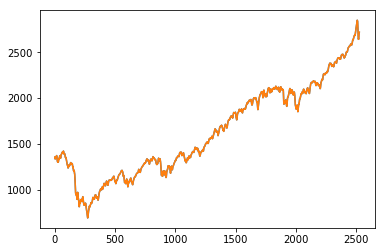

In [10]:
plt.plot(prices)
plt.show()

In [11]:
delta = []
for i in range(0,len(prices)-1):
    delta.append(prices[i+1]-prices[i])

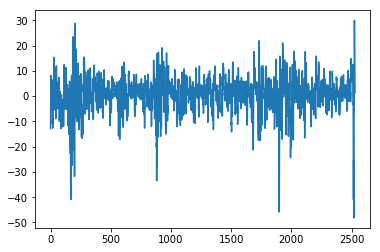

In [12]:
plt.plot(delta)
plt.show()

In [38]:
import numpy
print numpy.average(delta)
print numpy.std(delta)
mu = numpy.average(delta)
import matplotlib
variance = 0
sigma = numpy.std(t)
x = numpy.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.show()

0.0179316027996
0.226920554545


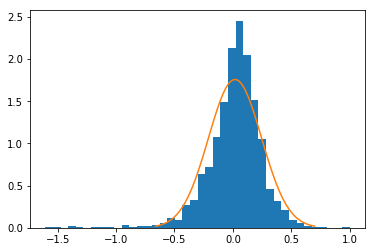

In [42]:
plt.hist(delta,bins=40,normed=True)
plt.plot(x,matplotlib.mlab.normpdf(x, mu, sigma))
plt.show()

In [54]:
weights = numpy.ones_like(delta)/float(len(delta))
plt.hist(delta, weights=weights,bins=50)
plt.plot(x,numpy.normpdf(x, mu, sigma))
plt.show()

AttributeError: 'module' object has no attribute 'normpdf'